In [1]:
import os
# os.environ["JAX_PLATFORM_NAME"] = "cpu"

import jax
import jax.numpy as jnp
from jax.tree_util import Partial
key = jax.random.PRNGKey(137)

import matplotlib.pyplot as plt

from scipy.spatial import KDTree
import jaxkd as jk

## Basic usage, no JIT

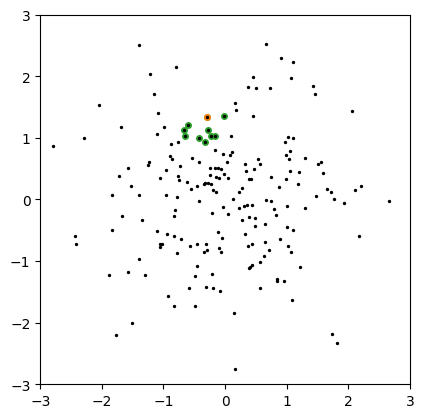

In [5]:
# Generate a few random points
n_points = 200
key, subkey = jax.random.split(key)
points = jax.random.normal(subkey, shape=(n_points, 2))
tree = jk.build_tree(points)
neighbors, distances = jk.query_neighbors(tree, points[0], 10)

# Plot
plt.scatter(*points[neighbors].T, s=16, c='C2')
plt.scatter(*points[0], s=16, c='C1')
plt.scatter(*points.T, s=2, c='k')
plt.gca().set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal')
plt.show()

## JIT compilation

In [ ]:
# JIT compilation
build_tree_jit = jax.jit(jk.build_tree, static_argnames=('optimized',))
query_neighbors_jit = jax.jit(jk.query_neighbors, static_argnums=(2,))

## More points, *highly* recommended to run on GPU

In [ ]:
# Test with larger number of points (run a second time to see compiled speed)
n_points = 10_000
key, subkey = jax.random.split(key)
points = jax.random.uniform(subkey, shape=(n_points, 2))
tree = build_tree_jit(points)
tree

tree(points=Array([[0.15466821, 0.6273818 ],
       [0.06185579, 0.911924  ],
       [0.5203887 , 0.77956843],
       ...,
       [0.63159657, 0.81793785],
       [0.5307418 , 0.73508334],
       [0.10786545, 0.20358777]], dtype=float32), indices=Array([1674, 8064, 8555, ..., 8291, 8535, 2687], dtype=int32), split_dims=Array([ 1,  0,  0, ..., -1, -1, -1], dtype=int32))

In [ ]:
# Find neighbors for all points (run a second time to see compiled speed)
neighbors, distances = query_neighbors_jit(tree, points, 10)
neighbors

Array([[3179, 4558,    0, ..., 1175, 2313, 5530],
       [ 790, 6186, 7487, ..., 8490,  756, 7925],
       [   2, 7416, 3280, ...,  547, 5490, 4232],
       ...,
       [3478, 4981, 5858, ..., 6084, 5305, 1102],
       [6850, 1276, 3568, ..., 2024, 8843, 9346],
       [9229, 9999, 9447, ...,  340, 1406,  125]], dtype=int32)

In [ ]:
# Build scipy KDTree to compare
scipy_tree = KDTree(points)

In [ ]:
# Find neighbors for all points again
scipy_neighbors = scipy_tree.query(points, k=6, workers=-1)[1]
scipy_neighbors

In [ ]:
# Do all points match? Guessing some issues from floating point precision...
jnp.sum(neighbors == scipy_neighbors) / neighbors.size

## Differentiation